In [1]:
import os
os.chdir('/Users/obadaessa/Desktop/Internship/Data Sets')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection       import train_test_split
from sklearn.metrics               import confusion_matrix
from sklearn.metrics               import accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing         import StandardScaler
from sklearn.model_selection       import cross_val_score, cross_val_predict
from sklearn.metrics               import precision_score
from sklearn                       import metrics
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestRegressor
from scipy import stats

import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import sklearn.metrics as mx
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data1 = pd.read_csv('loan.csv')

data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [3]:
data1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [4]:
data1.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
371,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
372,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y
373,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y
374,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
375,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data1.shape

(381, 13)

In [6]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
data1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.109875,0.004535
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001906,0.023015
LoanAmount,0.270681,0.114936,1.000000,0.123579,-0.047899
Loan_Amount_Term,-0.109875,0.001906,0.123579,1.000000,-0.013452
Credit_History,0.004535,0.023015,-0.047899,-0.013452,1.000000


In [8]:
data1.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data1['Gender'].value_counts()

Male      291
Female     85
Name: Gender, dtype: int64

In [10]:
data1['Gender'].fillna('Male', inplace=True)

In [11]:
data1['Dependents'].value_counts()

0     234
2      59
1      52
3+     28
Name: Dependents, dtype: int64

In [12]:
data1['Dependents'].fillna('0', inplace=True)

In [13]:
data1['Self_Employed'].value_counts()

No     325
Yes     35
Name: Self_Employed, dtype: int64

In [14]:
data1['Self_Employed'].fillna('No', inplace=True)

In [15]:
data1['Loan_Amount_Term'].value_counts()

360.0    312
180.0     29
480.0     11
300.0      7
84.0       3
120.0      3
240.0      2
36.0       1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
data1['Loan_Amount_Term'].fillna(360.0, inplace=True)

In [17]:
data1['Credit_History'].value_counts()

1.0    294
0.0     57
Name: Credit_History, dtype: int64

In [18]:
data1['Credit_History'].fillna(1.0, inplace=True)

In [19]:
data1.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1

In [21]:
data2 = data1[~((data1<(Q1 -1.5*IQR)) | (data1 >(Q3+1.5*IQR))).any(axis=1)]

In [22]:
data2.shape

(261, 13)

In [23]:
data2['Gender'].replace(['Male', 'Female'], ['1', '2'], inplace=True)
data2['Married'].replace(['Yes', 'No'], ['1', '0'], inplace=True)
data2['Dependents'].replace(['3+'], ['3'], inplace=True)
data2['Education'].replace(['Graduate', 'Not Graduate'], ['1', '2'], inplace=True)
data2['Self_Employed'].replace(['Yes', 'No'], ['1', '0'], inplace=True)
data2['Property_Area'].replace(['Semiurban', 'Urban', 'Rural'], ['2', '1', '3'], inplace=True)
data2['Loan_Status'].replace(['Y', 'N'], ['1', '0'], inplace=True)

data2['Gender'] = data2['Gender'].astype('int')
data2['Married'] = data2['Married'].astype('int')
data2['Dependents'] = data2['Dependents'].astype('int')
data2['Education'] = data2['Education'].astype('int')
data2['Self_Employed'] = data2['Self_Employed'].astype('int')
data2['Property_Area'] = data2['Property_Area'].astype('int')
data2['Loan_Status'] = data2['Loan_Status'].astype('int')
data2['Loan_Amount_Term'] = data2['Loan_Amount_Term'].astype('int')
data2['Credit_History'] = data2['Credit_History'].astype('int')

data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360,1,3,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360,1,1,1
2,LP001006,1,1,0,2,0,2583,2358.0,120.0,360,1,1,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360,1,1,1
4,LP001013,1,1,0,2,0,2333,1516.0,95.0,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,LP002925,1,0,0,1,0,4750,0.0,94.0,360,1,2,1
374,LP002940,1,0,0,2,0,3833,0.0,110.0,360,1,3,1
376,LP002953,1,1,3,1,0,5703,0.0,128.0,360,1,1,1
377,LP002974,1,1,0,1,0,3232,1950.0,108.0,360,1,3,1


In [24]:
data2.corrwith(data2['Loan_Status'], axis=0)

Gender              -0.039406
Married              0.039205
Dependents          -0.019073
Education           -0.051594
Self_Employed       -0.065851
ApplicantIncome     -0.097502
CoapplicantIncome    0.197235
LoanAmount           0.079428
Loan_Amount_Term          NaN
Credit_History            NaN
Property_Area       -0.070174
Loan_Status          1.000000
dtype: float64

In [25]:
fig = px.scatter_matrix(data2, 
                        dimensions=['ApplicantIncome', 'CoapplicantIncome',
                                    'LoanAmount', 'Property_Area', 'Loan_Status'])
fig.show()

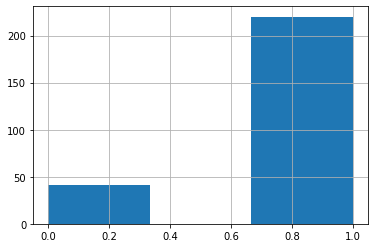

In [26]:
data2['Loan_Status'].hist(bins=3)

In [27]:
data2.pivot(columns='Loan_Status', 
            values='ApplicantIncome').iplot(kind='box', 
                                      xTitle='Loan Status',
                                      yTitle='Applicant Income', 
                                      title='Loan Status by Applicant Income')

In [28]:
data2.pivot(columns='Loan_Status', 
            values='CoapplicantIncome').iplot(kind='box', 
                                      xTitle='Loan Status',
                                      yTitle='Co-Applicant Income', 
                                      title='Loan Status by Co-Applicant Income')

In [29]:
data2.pivot(columns='Loan_Status', 
            values='LoanAmount').iplot(kind='box', 
                                      xTitle='Loan Status',
                                      yTitle='Loan Amount', 
                                      title='Loan Status by Loan Amount')

In [30]:
data2.pivot(columns='Loan_Status', 
            values='Property_Area').iplot(kind='box', 
                                      xTitle='Loan Status',
                                      yTitle='Property Area', 
                                      title='Loan Status by Property Area')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd167573290>,
      dtype=object)

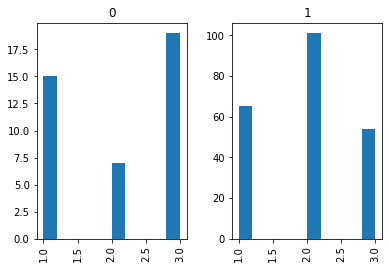

In [31]:
data2.hist(column = 'Property_Area', by = 'Loan_Status', bins=10)

In [32]:
from sklearn.cluster import KMeans

In [33]:
x = data2[['CoapplicantIncome', 'Loan_Status']].values

In [34]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

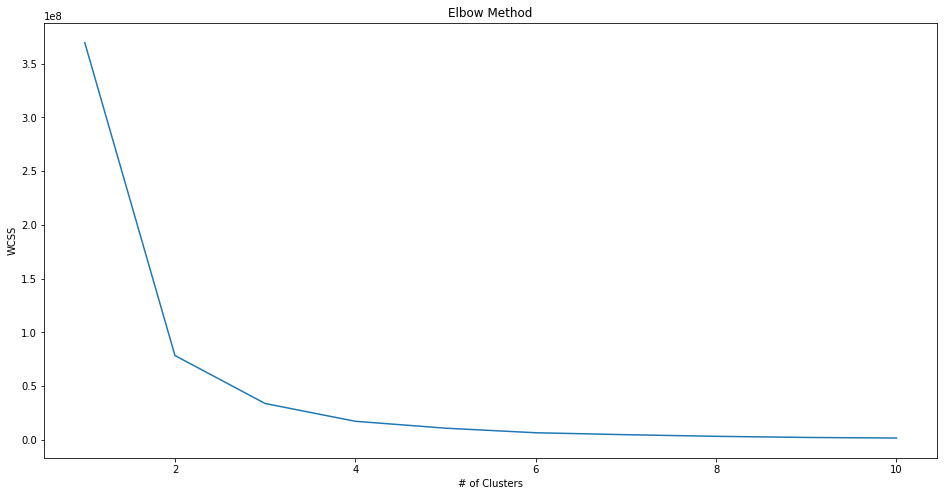

In [35]:
plt.figure(figsize=(16,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
ykmeans = kmeansmodel.fit_predict(x)

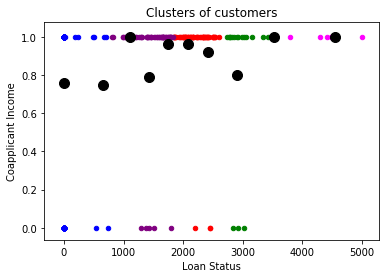

In [37]:
plt.scatter(x[ykmeans==0, 0], x[ykmeans==0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(x[ykmeans==1, 0], x[ykmeans==1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(x[ykmeans==2, 0], x[ykmeans==2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(x[ykmeans==3, 0], x[ykmeans==3, 1], s=20, c='purple', label='Cluster 4')
plt.scatter(x[ykmeans==4, 0], x[ykmeans==4, 1], s=20, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            s=100, c='black', label='Center')

plt.title('Clusters of customers')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
#plt.legend()
plt.show()

In [38]:
import random as rd

In [39]:
x = data2

In [40]:
k = 2

In [41]:
cen = (x.sample(n=k))

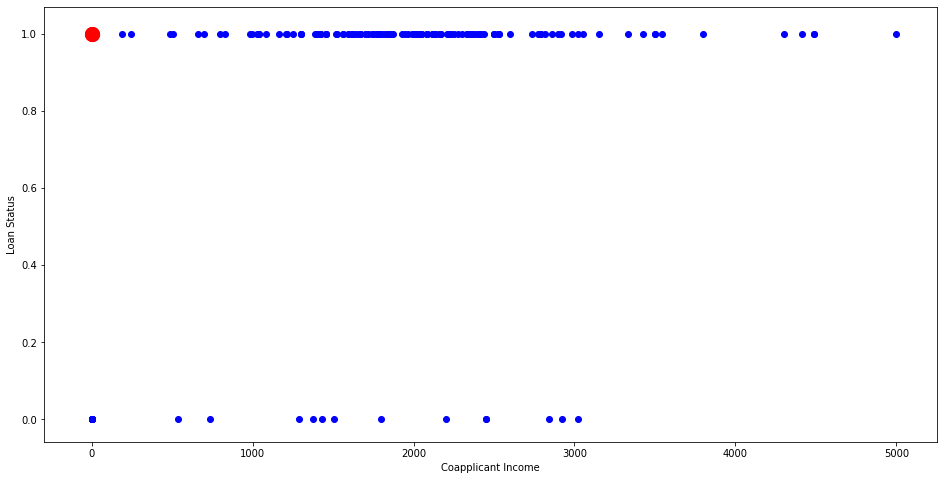

In [42]:
plt.figure(figsize=(16,8))
plt.scatter(x['CoapplicantIncome'], x['Loan_Status'], c='blue')
plt.scatter(cen['CoapplicantIncome'], cen['Loan_Status'], s=200, c='red')
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Status')
plt.show()

In [43]:
diff = 1
j = 0

while(diff!=0):
    xd = x
    i = 1
    for index1, rowc in cen.iterrows():
        ed = []
        for index2, rowd in xd.iterrows():
            d1 = (rowc['CoapplicantIncome']-rowd['CoapplicantIncome'])**2
            d2 = (rowc['Loan_Status']-rowd['Loan_Status'])**2
            d = np.sqrt(d1+d2)
            ed.append(d)
        x[i] = ed
        i += 1
        
    c = []
    for index, row in x.iterrows():
        mindist = row[1]
        pos = 1
        for i in range(k):
            if row[i+1] < mindist:
                mindist = row[i+1]
                pos = i+1
        c.append(pos)
    x['Cluster'] = c
    cennew = x.groupby(['Cluster']).mean()[['Loan_Status', 'CoapplicantIncome']]
    if j==0:
        diff=1
        j+=1
    else:
        diff = (cennew['Loan_Status']-cen['Loan_Status']).sum() + (cennew['CoapplicantIncome']-cen['CoapplicantIncome']).sum()
        print(diff.sum())
    cen = x.groupby(['Cluster']).mean()[['Loan_Status', 'CoapplicantIncome']]

958.5973228956159
159.6647682807174
16.183022900714008
0.0


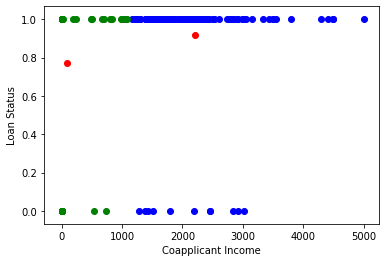

In [44]:
color = ['blue', 'green', 'cyan', 'orange', 'purple', 'yellow', 'magenta', 'brown']

for kay in range(k):
    data1 = x[x['Cluster']==kay+1]
    plt.scatter(data1['CoapplicantIncome'], data1['Loan_Status'], c=color[kay])
    
plt.scatter(cen['CoapplicantIncome'], cen['Loan_Status'], c='red')
plt.xlabel('Coapplicant Income')
plt.ylabel('Loan Status')
plt.show()

In [45]:
x = data2[['ApplicantIncome', 'Loan_Status']].values

In [46]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

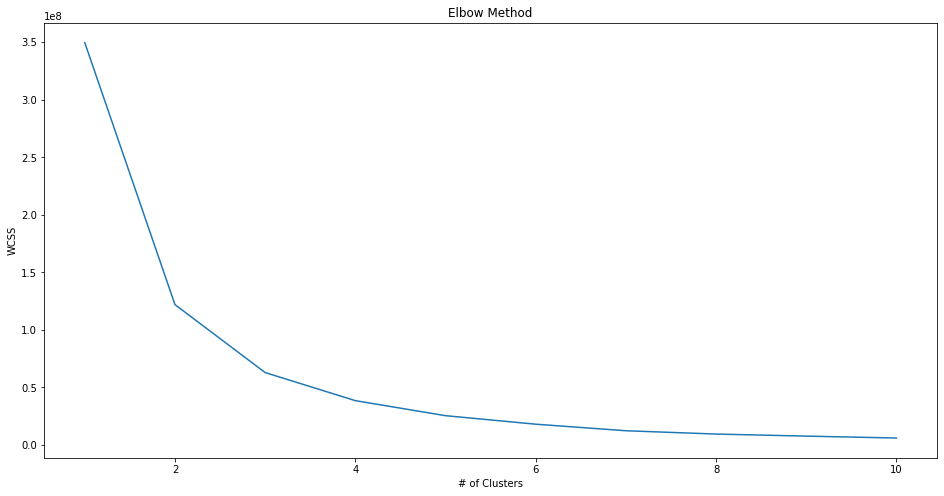

In [47]:
plt.figure(figsize=(16,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
ykmeans = kmeansmodel.fit_predict(x)

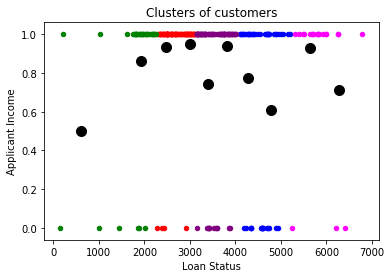

In [49]:
plt.scatter(x[ykmeans==0, 0], x[ykmeans==0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(x[ykmeans==1, 0], x[ykmeans==1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(x[ykmeans==2, 0], x[ykmeans==2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(x[ykmeans==3, 0], x[ykmeans==3, 1], s=20, c='purple', label='Cluster 4')
plt.scatter(x[ykmeans==4, 0], x[ykmeans==4, 1], s=20, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            s=100, c='black', label='Center')

plt.title('Clusters of customers')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
#plt.legend()
plt.show()

In [50]:
x = data2

In [51]:
k = 2

In [52]:
cen = (x.sample(n=k))

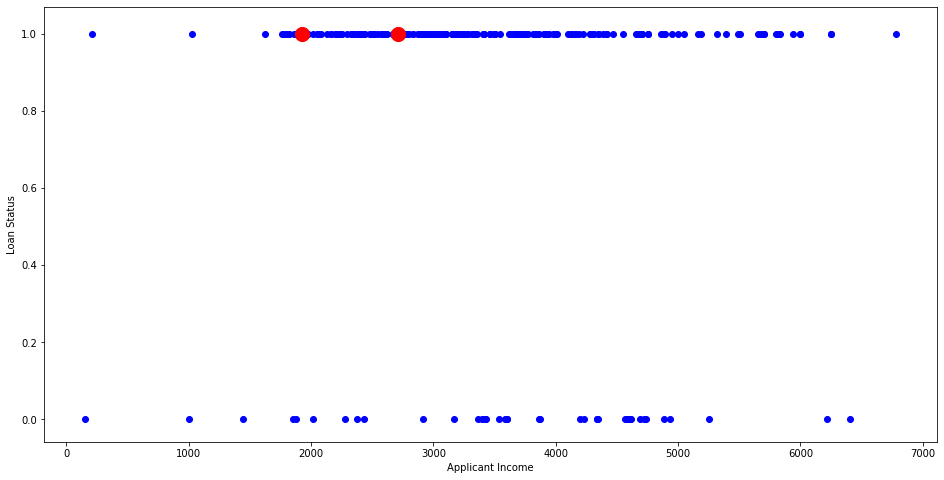

In [53]:
plt.figure(figsize=(16,8))
plt.scatter(x['ApplicantIncome'], x['Loan_Status'], c='blue')
plt.scatter(cen['ApplicantIncome'], cen['Loan_Status'], s=200, c='red')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Status')
plt.show()

In [54]:
diff = 1
j = 0

while(diff!=0):
    xd = x
    i = 1
    for index1, rowc in cen.iterrows():
        ed = []
        for index2, rowd in xd.iterrows():
            d1 = (rowc['ApplicantIncome']-rowd['ApplicantIncome'])**2
            d2 = (rowc['Loan_Status']-rowd['Loan_Status'])**2
            d = np.sqrt(d1+d2)
            ed.append(d)
        x[i] = ed
        i += 1
        
    c = []
    for index, row in x.iterrows():
        mindist = row[1]
        pos = 1
        for i in range(k):
            if row[i+1] < mindist:
                mindist = row[i+1]
                pos = i+1
        c.append(pos)
    x['Cluster'] = c
    cennew = x.groupby(['Cluster']).mean()[['Loan_Status', 'ApplicantIncome']]
    if j==0:
        diff=1
        j+=1
    else:
        diff = (cennew['Loan_Status']-cen['Loan_Status']).sum() + (cennew['ApplicantIncome']-cen['ApplicantIncome']).sum()
        print(diff.sum())
    cen = x.groupby(['Cluster']).mean()[['Loan_Status', 'ApplicantIncome']]

647.9237124176491
385.0622081530398
289.455996978099
215.09162393240163
119.53457714767669
45.585346264248656
30.718583027768187
0.0


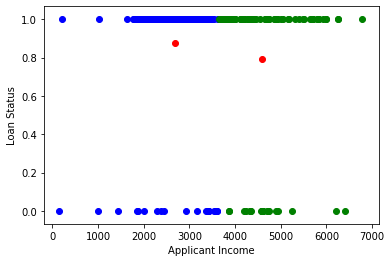

In [55]:
color = ['blue', 'green', 'cyan', 'orange', 'purple', 'yellow', 'magenta', 'brown']

for kay in range(k):
    data1 = x[x['Cluster']==kay+1]
    plt.scatter(data1['ApplicantIncome'], data1['Loan_Status'], c=color[kay])
    
plt.scatter(cen['ApplicantIncome'], cen['Loan_Status'], c='red')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Status')
plt.show()

In [56]:
x = data2[['LoanAmount', 'Loan_Status']].values

In [57]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

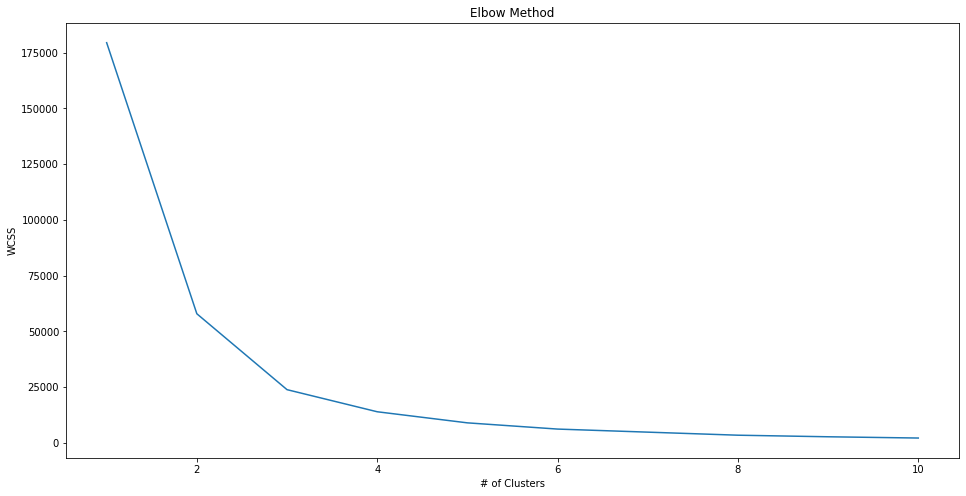

In [58]:
plt.figure(figsize=(16,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
ykmeans = kmeansmodel.fit_predict(x)

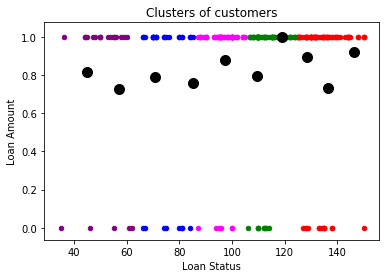

In [60]:
plt.scatter(x[ykmeans==0, 0], x[ykmeans==0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(x[ykmeans==1, 0], x[ykmeans==1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(x[ykmeans==2, 0], x[ykmeans==2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(x[ykmeans==3, 0], x[ykmeans==3, 1], s=20, c='purple', label='Cluster 4')
plt.scatter(x[ykmeans==4, 0], x[ykmeans==4, 1], s=20, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            s=100, c='black', label='Center')

plt.title('Clusters of customers')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
#plt.legend()
plt.show()

In [61]:
x = data2

In [62]:
k = 2

In [63]:
cen = (x.sample(n=k))

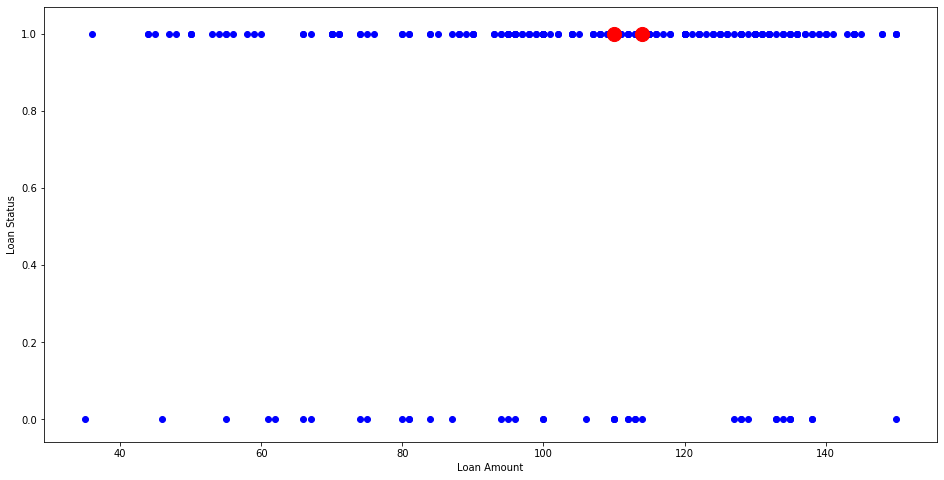

In [64]:
plt.figure(figsize=(16,8))
plt.scatter(x['LoanAmount'], x['Loan_Status'], c='blue')
plt.scatter(cen['LoanAmount'], cen['Loan_Status'], s=200, c='red')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.show()

In [65]:
diff = 1
j = 0

while(diff!=0):
    xd = x
    i = 1
    for index1, rowc in cen.iterrows():
        ed = []
        for index2, rowd in xd.iterrows():
            d1 = (rowc['LoanAmount']-rowd['LoanAmount'])**2
            d2 = (rowc['Loan_Status']-rowd['Loan_Status'])**2
            d = np.sqrt(d1+d2)
            ed.append(d)
        x[i] = ed
        i += 1
        
    c = []
    for index, row in x.iterrows():
        mindist = row[1]
        pos = 1
        for i in range(k):
            if row[i+1] < mindist:
                mindist = row[i+1]
                pos = i+1
        c.append(pos)
    x['Cluster'] = c
    cennew = x.groupby(['Cluster']).mean()[['Loan_Status', 'LoanAmount']]
    if j==0:
        diff=1
        j+=1
    else:
        diff = (cennew['Loan_Status']-cen['Loan_Status']).sum() + (cennew['LoanAmount']-cen['LoanAmount']).sum()
        print(diff.sum())
    cen = x.groupby(['Cluster']).mean()[['Loan_Status', 'LoanAmount']]

-7.766158449700779
-3.1260112752217326
-1.4227379460874792
0.0


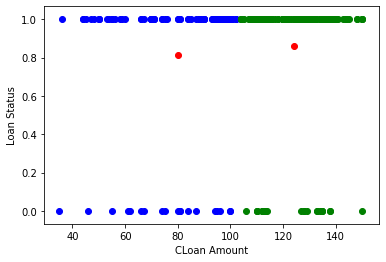

In [66]:
color = ['blue', 'green', 'cyan', 'orange', 'purple', 'yellow', 'magenta', 'brown']

for kay in range(k):
    data1 = x[x['Cluster']==kay+1]
    plt.scatter(data1['LoanAmount'], data1['Loan_Status'], c=color[kay])
    
plt.scatter(cen['LoanAmount'], cen['Loan_Status'], c='red')
plt.xlabel('CLoan Amount')
plt.ylabel('Loan Status')
plt.show()

In [67]:
x = data2[['Property_Area', 'Loan_Status']].values

In [68]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ConvergenceWarning:

Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.



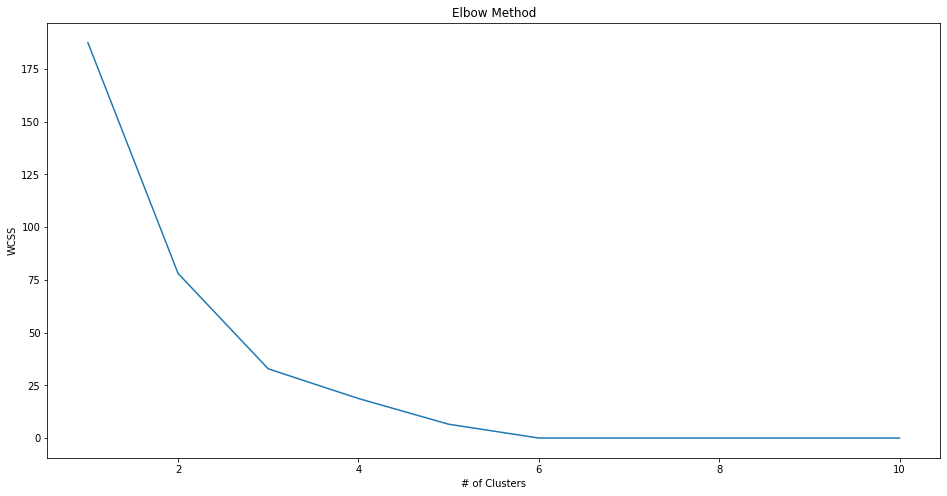

In [69]:
plt.figure(figsize=(16,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
ykmeans = kmeansmodel.fit_predict(x)

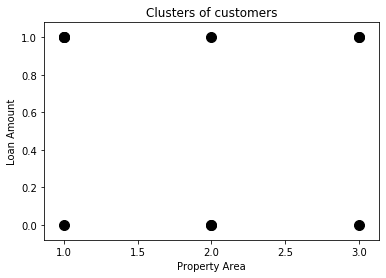

In [71]:
plt.scatter(x[ykmeans==0, 0], x[ykmeans==0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(x[ykmeans==1, 0], x[ykmeans==1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(x[ykmeans==2, 0], x[ykmeans==2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(x[ykmeans==3, 0], x[ykmeans==3, 1], s=20, c='purple', label='Cluster 4')
plt.scatter(x[ykmeans==4, 0], x[ykmeans==4, 1], s=20, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            s=100, c='black', label='Center')

plt.title('Clusters of customers')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
#plt.legend()
plt.show()

In [72]:
x = data2

In [73]:
k = 3

In [74]:
cen = (x.sample(n=k))

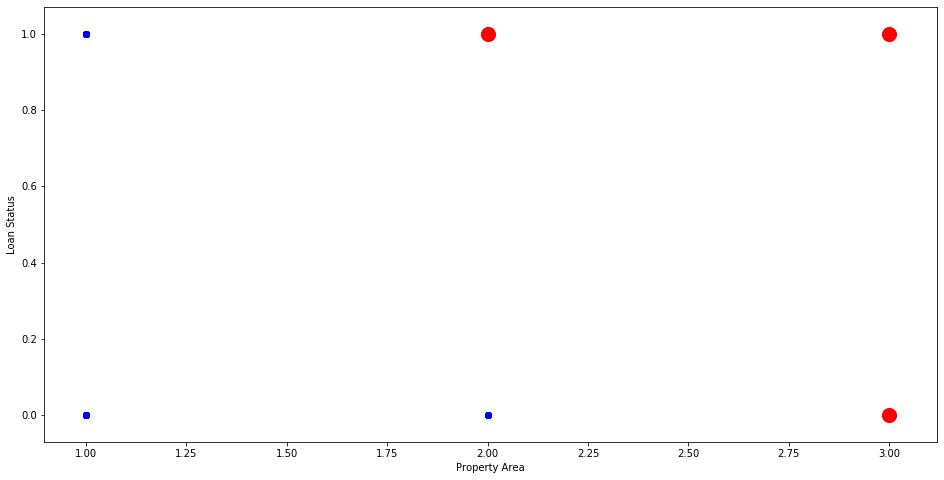

In [75]:
plt.figure(figsize=(16,8))
plt.scatter(x['Property_Area'], x['Loan_Status'], c='blue')
plt.scatter(cen['Property_Area'], cen['Loan_Status'], s=200, c='red')
plt.xlabel('Property Area')
plt.ylabel('Loan Status')
plt.show()

In [76]:
diff = 1
j = 0

while(diff!=0):
    xd = x
    i = 1
    for index1, rowc in cen.iterrows():
        ed = []
        for index2, rowd in xd.iterrows():
            d1 = (rowc['Property_Area']-rowd['Property_Area'])**2
            d2 = (rowc['Loan_Status']-rowd['Loan_Status'])**2
            d = np.sqrt(d1+d2)
            ed.append(d)
        x[i] = ed
        i += 1
        
    c = []
    for index, row in x.iterrows():
        mindist = row[1]
        pos = 1
        for i in range(k):
            if row[i+1] < mindist:
                mindist = row[i+1]
                pos = i+1
        c.append(pos)
    x['Cluster'] = c
    cennew = x.groupby(['Cluster']).mean()[['Loan_Status', 'Property_Area']]
    if j==0:
        diff=1
        j+=1
    else:
        diff = (cennew['Loan_Status']-cen['Loan_Status']).sum() + (cennew['Property_Area']-cen['Property_Area']).sum()
        print(diff.sum())
    cen = x.groupby(['Cluster']).mean()[['Loan_Status', 'Property_Area']]

0.0


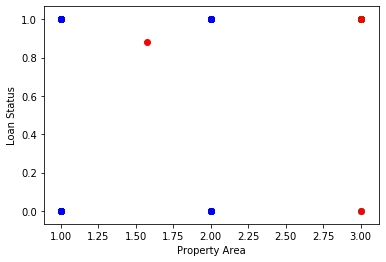

In [77]:
color = ['blue', 'green', 'cyan', 'orange', 'purple', 'yellow', 'magenta', 'brown']

for kay in range(k):
    data1 = x[x['Cluster']==kay+1]
    plt.scatter(data1['Property_Area'], data1['Loan_Status'], c=color[kay])
    
plt.scatter(cen['Property_Area'], cen['Loan_Status'], c='red')
plt.xlabel('Property Area')
plt.ylabel('Loan Status')
plt.show()

In [78]:
x = data2[['ApplicantIncome', 'CoapplicantIncome',
            'LoanAmount', 'Property_Area', 'Loan_Status']].values

In [79]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

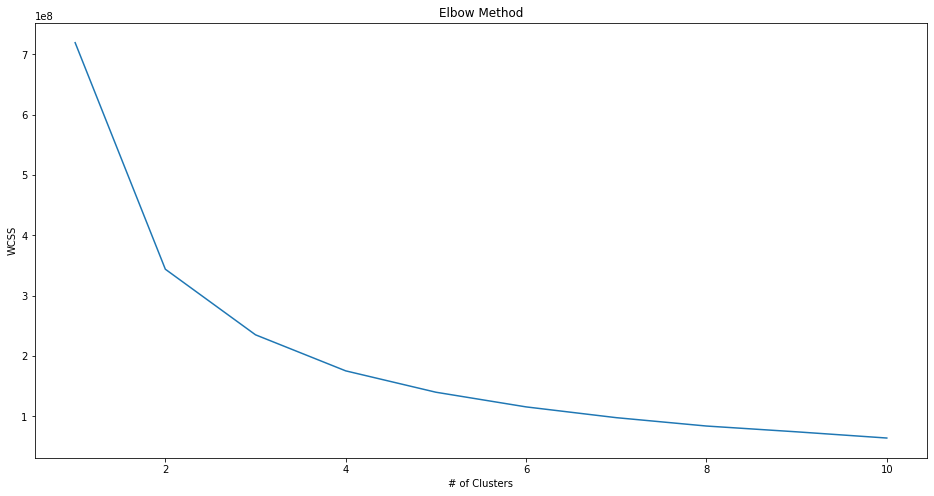

In [80]:
plt.figure(figsize=(16,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)
ykmeans = kmeansmodel.fit_predict(x)

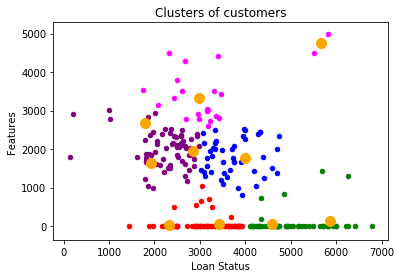

In [82]:
plt.scatter(x[ykmeans==0, 0], x[ykmeans==0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(x[ykmeans==1, 0], x[ykmeans==1, 1], s=20, c='blue', label='Cluster 2')
plt.scatter(x[ykmeans==2, 0], x[ykmeans==2, 1], s=20, c='green', label='Cluster 3')
plt.scatter(x[ykmeans==3, 0], x[ykmeans==3, 1], s=20, c='purple', label='Cluster 4')
plt.scatter(x[ykmeans==4, 0], x[ykmeans==4, 1], s=20, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            s=100, c='orange', label='Center')

plt.title('Clusters of customers')
plt.xlabel('Loan Status')
plt.ylabel('Features')
#plt.legend()
plt.show()